# Gaussian curve
## Approach
- pygame

I want to create a gaussian curve simulation that drops balls into a plinko style machine with a 50:50 to bounce either way. This will require a solution other than coding in bouncing physics as that's too much investment into something not very relevant.
<div>
        -           0
       - -          1
      - - -         2
     - - - -        3
    - - - - -       4
   - - - - - -      5
  - - - - - - -     6
|_|_|_|_|_|_|_|_|   7
<div>
Balls drop onto the top peg and can go left or right. Every following peg has the chance to go left or right until it hits the bucket. Keep track of the current row and which peg in the row (peg number increments when ball is sent right by the previous row).

[] initialise peg board
[] "drop ball"
[] highlight route
[] record bucket
[] repeat

In [2]:

# %pip install numpy
# # sudo apt-get install libopenblas-dev              specific to the raspberry pi
# %pip install scipy
# %pip install scikit-learn
# % pip install --force-reinstall -v --prefer-binary matplotlib==3.8.2

16 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
16 [4, 43, 301, 1416, 4153, 8936, 15146, 19697, 19696, 15543, 9199, 4112, 1414, 302, 34, 4]


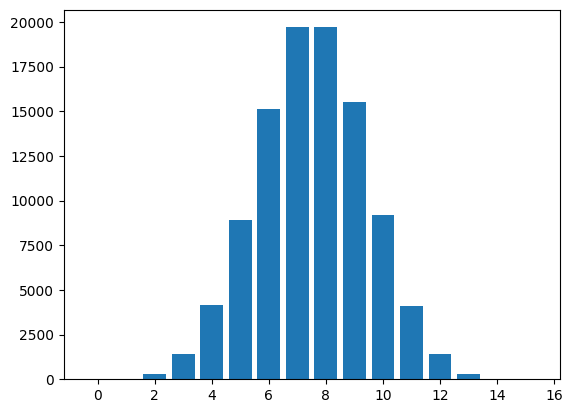

In [3]:


import numpy as np
from scipy.stats import norm
from random import randint
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor

NUM_OF_BALLS = 100000
NUM_ROWS = 15

def binary():
    'Returns uniform random bit in integer format'
    return randint(0,1)

# initialise buckets at the bottom of the pegboard to record results
buckets = dict()
for idx in range(0,NUM_ROWS+1):
    buckets[idx] = 0

# run the model
for _ in range(0, NUM_OF_BALLS):
    ball_pos = 0
    for row in range(0, NUM_ROWS):
        ball_pos += binary()
    # record result in pegboard buckets
    buckets[ball_pos] += 1

# display how full the buckets are
# print(dict(sorted(buckets.items())))
plt.bar(x = buckets.keys(), height = buckets.values())

# extract bucket info as we'll need this later
x, y = [list() for _ in range(2)]
for element in buckets.items():
    x.append(element[0])
    y.append(element[1])
print(len(x), x)
print(len(y), y)
datx = np.array(x)
daty = np.array(y)
# print(datx)
# print(daty)
# plt.ylim(min(y),round(max(y), 1-len(str(max(y)))))
plt.show()